<a href="https://colab.research.google.com/github/vivek-varshney/Models/blob/main/Hydraulic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def get_doc_file(dic_path):
  doc_file = open(dic_path, 'r', encoding="ISO-8859-1")
  return doc_file.read()

#Description

In [ ]:
print(get_doc_file('/content/drive/MyDrive/data/data/description.txt'))

Condition monitoring of hydraulic systems

Abtract: The data set addresses the condition assessment of a hydraulic test rig based on multi sensor data. Four fault types are superimposed with several severity grades impeding selective quantification.

Source:
Creator: ZeMA gGmbH, Eschberger Weg 46, 66121 Saarbrücken
Contact: t.schneider@zema.de, s.klein@zema.de, m.bastuck@lmt.uni-saarland.de, info@lmt.uni-saarland.de

Data Type: Multivariate, Time-Series
Task: Classification, Regression
Attribute Type: Categorical, Real
Area: CS/Engineering
Format Type: Matrix
Does your data set contain missing values? No

Number of Instances: 2205

Number of Attributes: 43680 (8x60 (1 Hz) + 2x600 (10 Hz) + 7x6000 (100 Hz))

Relevant Information:
The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duratio

#Documentation

In [ ]:
print(get_doc_file('/content/drive/MyDrive/data/data/documentation.txt'))

1. Title: Condition monitoring of hydraulic systems

2. Source Information
   -- Creator: Nikolai Helwig, ZeMA gGmbH, Eschberger Weg 46, 66121 Saarbrücken
   -- Donors (with approval from creator): M. Bastuck (m.bastuck@lmt.uni-saarland.de), T. Schneider (t.schneider@zema.de)
   -- Date: April, 2018
 
3. Past Usage:
   [1] Nikolai Helwig, Eliseo Pignanelli, Andreas Schütze, Condition Monitoring of a Complex Hydraulic System Using Multivariate Statistics, in Proc. I2MTC-2015 - 2015 IEEE International Instrumentation and Measurement Technology Conference, paper PPS1-39, Pisa, Italy, May 11-14, 2015. doi: 10.1109/I2MTC.2015.7151267
      -- detailed description of data and measurement setup
      -- automated feature extraction via Pearson correlation and comparison of several classification algorithms
      -- Cooler and Valve states are "easy" targets (perfect classification achieved), Pump and especially Accumulator states are more complex targets

   [2] N. Helwig, A. Schütze, Dete

# Importing and EDA

##EDA

In [ ]:
def get_file(dic_path):
  return pd.read_csv(dic_path,sep='\t',header = None)

In [ ]:
FS1 = get_file('/content/drive/MyDrive/data/data/FS1.txt')
FS1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,0.001,0.005,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.005,0.003,0.000,0.001,0.001,0.003,0.001,0.003,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.003,0.003,0.000,...,7.904,7.703,7.917,7.902,7.846,7.881,7.737,8.046,7.775,7.730,8.006,7.864,7.859,7.911,7.739,8.004,7.857,7.684,7.971,7.829,7.907,7.885,7.680,7.980,7.890,7.744,7.927,7.795,7.908,7.919,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,0.008,0.000,0.001,0.003,0.004,0.000,0.001,0.004,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.003,0.000,0.000,0.000,0.001,0.001,0.001,0.003,0.001,0.003,0.008,0.000,...,7.933,7.791,7.915,7.928,7.802,7.975,7.776,8.029,7.946,7.875,7.913,7.723,8.009,7.869,7.980,7.939,7.758,7.908,7.772,7.999,7.926,7.862,7.899,7.724,7.946,7.860,7.986,7.888,7.714,7.965,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,0.000,0.001,0.001,0.003,0.001,0.001,0.001,0.004,0.004,0.003,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.003,0.001,0.000,0.000,0.004,0.001,0.003,0.001,0.000,0.003,0.001,0.000,0.000,...,8.000,7.768,8.058,7.918,7.751,7.902,7.781,7.910,7.759,7.999,7.854,7.959,7.867,7.873,7.857,7.777,7.959,7.778,8.051,7.907,7.994,7.892,7.796,7.888,7.678,7.861,7.835,8.016,7.878,7.994,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.003,0.001,0.003,0.003,0.001,0.001,0.006,0.000,0.004,0.001,0.001,0.006,0.000,0.001,0.003,0.005,0.000,0.000,0.000,...,7.831,7.943,7.778,7.869,7.762,7.956,7.772,7.966,7.758,7.934,7.936,7.976,7.890,7.909,7.826,7.718,7.917,7.817,7.927,7.791,7.862,7.848,7.990,7.834,7.953,7.941,7.882,7.835,7.779,7.938,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,0.001,0.001,0.000,0.001,0.005,0.000,0.000,0.000,0.001,0.000,0.001,0.003,0.005,0.001,0.001,0.000,0.001,0.001,0.003,0.001,0.000,0.003,0.003,0.001,0.001,0.001,0.000,0.000,0.000,0.000,...,7.808,7.706,7.976,7.688,7.909,7.816,7.777,7.748,7.992,7.786,7.875,7.779,7.951,7.819,8.072,7.806,7.929,7.873,7.875,7.887,7.844,7.884,7.756,7.902,7.673,7.921,7.731,8.001,7.702,8.022,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,8.173,1.024,0.834,0.009,0.000,0.001,0.000,0.003,0.001,0.000,0.001,0.001,0.004,0.000,0.000,0.004,0.001,0.000,0.001,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.001,0.001,0.003,0.000,0.000,0.003,0.000,0.003,0.000,0.001,...,7.903,7.723,7.991,7.861,7.674,8.024,7.921,7.749,7.923,7.791,7.966,7.836,7.733,8.049,7.856,7.701,8.028,7.852,7.731,7.930,7.783,7.951,7.845,7.724,8.019,7.893,7.699,8.039,7.888,7.763,7.904,7.777,7.938,7.841,7.741,8.004,7.869,7.719,8.003,7.874
2201,8.317,0.883,0.799,0.008,0.005,0.000,0.000,0.000,0.000,0.001,0.001,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.006,0.000,0.000,0.000,0.001,0.000,0.001,0.000,...,7.694,7.999,7.894,7.704,7.956,7.820,7.833,7.955,7.796,7.999,7.852,7.691,8.041,7.900,7.676,7.976,7.821,7.811,7.906,7.756,7.946,7.841,7.701,8.029,7.879,7.686,7.970,7.843,7.816,7.948,7.766,7.957,7.817,7.739,8.036,7.871,7.647,7.993,7

In [ ]:
d = lambda x : [np.arange(i,i+10) for i in x]
num = d(np.arange(0,600,10))
num

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]),
 array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109]),
 array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 array([130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
 array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),
 array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159]),
 array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169]),
 array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179]),
 array([180, 181, 182, 183, 18

In [ ]:
FS1_new = pd.DataFrame(columns=[0])
for i in range(0,60):
  col = (FS1.iloc[:,num[i]].mean(axis=1))
  FS1_new[i] = col

In [ ]:
FS1_new['mean60'] = FS1_new.mean(axis = 1)

In [ ]:
FS1['mean'] = FS1.mean(axis = 1)

In [ ]:
print(np.concatenate((FS1['mean'].values.reshape(len(FS1['mean']),1), FS1_new['mean60'].values.reshape(len(FS1_new['mean60']),1)),1))

[[6.709815   6.709815  ]
 [6.715315   6.715315  ]
 [6.71852167 6.71852167]
 ...
 [6.69327667 6.69327667]
 [6.68412833 6.68412833]
 [6.69230167 6.69230167]]


In [ ]:
FS1_new['Diff'] = FS1['mean'].values - FS1_new['mean60'].values

In [ ]:
print(np.round(FS1_new['Diff'],2).value_counts())

0.0    2205
Name: Diff, dtype: int64


##IMPORTING ALL FILES

In [ ]:
PS1 = get_file('/content/drive/MyDrive/data/data/PS1.txt')
PS2 = get_file('/content/drive/MyDrive/data/data/PS2.txt')
PS3 = get_file('/content/drive/MyDrive/data/data/PS3.txt')
PS4 = get_file('/content/drive/MyDrive/data/data/PS4.txt')
PS5 = get_file('/content/drive/MyDrive/data/data/PS5.txt')
PS6 = get_file('/content/drive/MyDrive/data/data/PS6.txt')
EPS1 = get_file('/content/drive/MyDrive/data/data/EPS1.txt')
FS2 = get_file('/content/drive/MyDrive/data/data/FS2.txt')
TS1 = get_file('/content/drive/MyDrive/data/data/TS1.txt')
TS2 = get_file('/content/drive/MyDrive/data/data/TS2.txt')
TS3 = get_file('/content/drive/MyDrive/data/data/TS3.txt')
TS4 = get_file('/content/drive/MyDrive/data/data/TS4.txt')
VS1 = get_file('/content/drive/MyDrive/data/data/VS1.txt')
CE = get_file('/content/drive/MyDrive/data/data/CE.txt')
CP = get_file('/content/drive/MyDrive/data/data/CP.txt')
SE = get_file('/content/drive/MyDrive/data/data/SE.txt')

In [ ]:
b = [PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE]
for i in b:
  i['mean'] = i.mean(axis = 1)

In [ ]:
col = ['PS1','PS2','PS3','PS4','PS5','PS6','EPS1','FS1','FS2','TS1','TS2','TS3','TS4','VS1','CE','CP','SE']
final_data = pd.DataFrame(columns=col)

In [ ]:
for i,j in zip(b,col):
  new = np.round(i['mean'],3)
  final_data[j] = new

In [ ]:
final_data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,40.979,38.471,31.745,0.577,39.601,1.863,59.157
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,41.533,38.979,34.494,0.566,25.786,1.256,59.336
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,42.442,39.632,35.646,0.577,22.218,1.113,59.543
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,43.404,40.403,36.579,0.569,20.460,1.062,59.795
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,44.333,41.311,37.428,0.577,19.787,1.070,59.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,40.875,38.269,30.405,0.551,46.629,2.161,59.033
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,40.869,38.268,30.416,0.547,46.690,2.151,59.068
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,40.876,38.246,30.426,0.545,46.472,2.143,59.132
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,40.876,38.246,30.414,0.537,46.545,2.148,58.971


In [ ]:
Profile = (get_file('/content/drive/MyDrive/data/data/profile.txt'))
Profile

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [ ]:
final_data['CC'] = Profile[0]
final_data['VC'] = Profile[1]
final_data['IPL'] = Profile[2]
final_data['HA'] = Profile[3]
final_data['SF'] = Profile[4]

In [ ]:
data = final_data

In [ ]:
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,40.979,38.471,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,41.533,38.979,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,42.442,39.632,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,43.404,40.403,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,44.333,41.311,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,40.875,38.269,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,40.869,38.268,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,40.876,38.246,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,40.876,38.246,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


Export final data

In [ ]:
data.to_csv('Hydraulic_dataset.csv') #export final data

#Data Preparing for training

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/Hydraulic_dataset.csv').iloc[:,1:]

In [ ]:
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,40.979,38.471,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,41.533,38.979,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,42.442,39.632,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,43.404,40.403,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,44.333,41.311,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,40.875,38.269,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,40.869,38.268,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,40.876,38.246,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,40.876,38.246,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


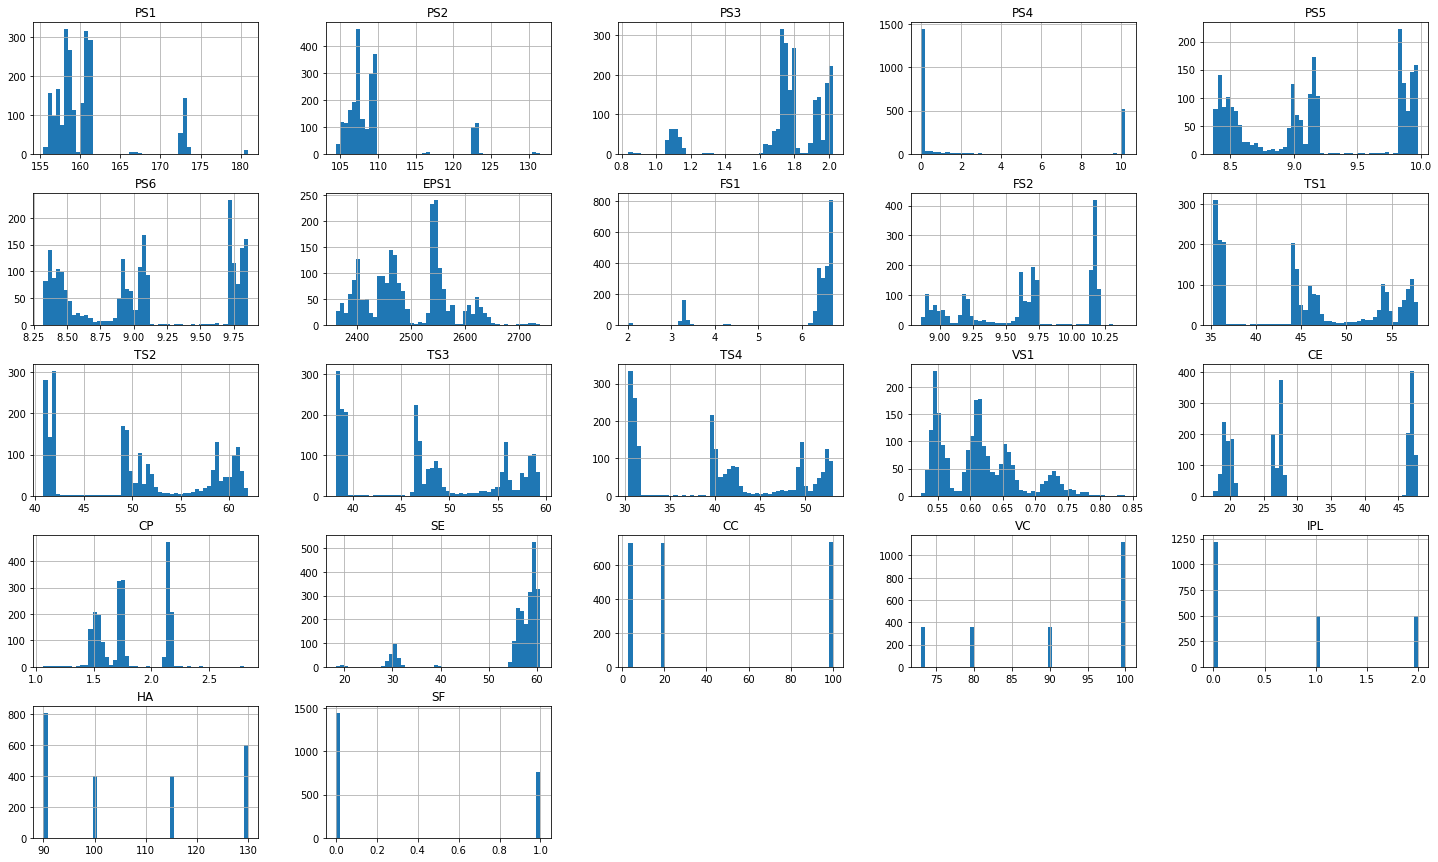

In [ ]:
data.hist(bins=50, figsize=(25,15));

##Dependent Varible CC

In [ ]:
X = data.iloc[:,:17].values
y = data.iloc[:,-5].values

In [ ]:
X

array([[160.673, 109.467,   1.991, ...,  39.601,   1.863,  59.157],
       [160.603, 109.355,   1.976, ...,  25.786,   1.256,  59.336],
       [160.348, 109.159,   1.972, ...,  22.218,   1.113,  59.543],
       ...,
       [161.192, 109.756,   1.993, ...,  46.472,   2.143,  59.132],
       [161.209, 109.794,   2.007, ...,  46.545,   2.148,  58.971],
       [161.217, 109.792,   2.003, ...,  46.648,   2.157,  59.054]])

In [ ]:
y

array([  3,   3,   3, ..., 100, 100, 100])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 10)

LogisticRegression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([('Scaleing',StandardScaler()),
                        ('lr_classifer',LogisticRegression(random_state = 0))])

In [ ]:
pipeline_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaleing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr_classifer',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_pred = pipeline_lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[142   1   0]
 [  1 147   0]
 [  0   0 150]]


0.9954648526077098

In [ ]:
from sklearn.model_selection import cross_val_score
def scores(reg, independent, dependent):
  scores = cross_val_score(reg, independent, dependent,
                           scoring = 'neg_mean_squared_error',cv = 10)
  scores = np.sqrt(-scores)
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [ ]:
scores(pipeline_lr,X_train,y_train)

Scores: [0.         0.         6.01316822 0.         0.         0.
 7.31165011 0.         1.28142321 0.        ]
Mean: 1.4606241544488894
Standard deviation: 2.644356927725016


DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipeline_dt = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',DecisionTreeClassifier(random_state = 0,criterion = 'entropy'))])

In [ ]:
pipeline_dt.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaleing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Dictree_classifer',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)

In [ ]:
y_pred_cc = pipeline_dt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_cc)
print(cm)
accuracy_score(y_test, y_pred_cc)

[[143   0   0]
 [  0 148   0]
 [  0   0 150]]


1.0

In [ ]:
scores(pipeline_dt,X_train,y_train)

Scores: [0.         0.         6.01316822 0.         0.         0.
 7.31165011 0.         0.         0.        ]
Mean: 1.3324818330033399
Standard deviation: 2.6807338735928887


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',RandomForestClassifier(random_state = 0,criterion = 'entropy'))])

In [ ]:
pipeline_rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaleing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Dictree_classifer',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_pred_ = pipeline_rf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[142   1   0]
 [  1 147   0]
 [  0   0 150]]


0.9954648526077098

In [ ]:
scores(pipeline_rf,X_train,y_train)

Scores: [0.         0.         6.01316822 0.         0.         0.
 7.31165011 0.         0.         0.        ]
Mean: 1.3324818330033399
Standard deviation: 2.6807338735928887


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))])

In [ ]:
pipeline_knn.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaleing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Dictree_classifer',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
y_pred = pipeline_knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[143   0   0]
 [  1 147   0]
 [  0   0 150]]


0.9977324263038548

In [ ]:
scores(pipeline_knn,X_train,y_train)

Scores: [0.         0.         6.01316822 0.         0.         0.
 7.31165011 0.         0.         0.        ]
Mean: 1.3324818330033399
Standard deviation: 2.6807338735928887


SVM

In [ ]:
from sklearn.svm import SVC
pipeline_svc = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',SVC(kernel = 'linear', random_state = 0))])

In [ ]:
pipeline_svc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaleing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Dictree_classifer',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_pred = pipeline_svc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[142   1   0]
 [  1 147   0]
 [  0   0 150]]


0.9954648526077098

In [ ]:
scores(pipeline_svc,X_train,y_train)

Scores: [0.         0.         6.01316822 0.         0.         0.
 7.31165011 0.         0.         0.        ]
Mean: 1.3324818330033399
Standard deviation: 2.6807338735928887


Naive base

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline_nd = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',GaussianNB())])

In [ ]:
pipeline_nd.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaleing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Dictree_classifer',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [ ]:
y_pred = pipeline_nd.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[143   0   0]
 [  2 146   0]
 [  1   0 149]]


0.9931972789115646

In [ ]:
scores(pipeline_nd,X_train,y_train)

Scores: [1.27779825 1.27779825 6.14743527 0.         1.28142321 0.
 7.31165011 1.28142321 1.28142321 1.28142321]
Mean: 2.1140374733364284
Standard deviation: 2.3747286556434952


So, We get best result in Decision Tree

In [ ]:
#y_pred_cc

##Dependent Varible VC

In [ ]:
X = data.iloc[:,:17].values
y = data.iloc[:,-4].values

In [ ]:
y

array([100, 100, 100, ..., 100, 100, 100])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 10 )

In [ ]:
pipeline_lr = Pipeline([('Scaleing',StandardScaler()),
                        ('lr_classifer',LogisticRegression(random_state = 0))])
pipeline_dt = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',DecisionTreeClassifier(random_state = 0,criterion = 'entropy'))])
pipeline_rf = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',RandomForestClassifier(random_state = 0,criterion = 'entropy'))])
pipeline_knn = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))])
pipeline_svc = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',SVC(kernel = 'linear', random_state = 0))])
pipeline_nd = Pipeline([('Scaleing',StandardScaler()),
                        ('Dictree_classifer',GaussianNB())])

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svc,pipeline_nd]

for i in full_pipeline:
  i.fit(X_train,y_train)

In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  scores(i,X_train,y_train)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print('Accuracy: ',accuracy_score(y_test, y_pred))
  print("\n\n")

Logistic regression :-
Scores: [6.72124551 6.43919846 6.75771164 6.84452026 7.25744132 7.33608764
 6.58338128 7.52080448 6.54486266 6.47898701]
Mean: 6.848424027709148
Standard deviation: 0.36714727213841475
[[ 69   2   0   0]
 [ 18  18   0  25]
 [  1   2  11  51]
 [  2   0   7 235]]
Accuracy:  0.7551020408163265



dession tree :-
Scores: [3.42638483 3.05227525 3.65534977 1.67736678 3.62049093 1.91732532
 2.48518337 2.32207783 2.42383993 3.32774152]
Mean: 2.7908035513827447
Standard deviation: 0.6816839559216629
[[ 67   1   2   1]
 [  3  54   2   2]
 [  1   4  58   2]
 [  0   3   7 234]]
Accuracy:  0.9365079365079365



random forest :-
Scores: [3.23819019 2.93719571 3.03370892 0.         2.55507516 2.58711844
 1.68549966 2.06017431 1.99145904 2.41562151]
Mean: 2.25040429356513
Standard deviation: 0.8821079231750384
[[ 70   1   0   0]
 [  1  60   0   0]
 [  1   1  61   2]
 [  1   0   4 239]]
Accuracy:  0.9750566893424036



KNN :-
Scores: [4.88222881 6.32321523 5.36940485 4.88454267 6

here we get best result in Random Forest

In [ ]:
y_pred_vc = pipeline_rf.predict(X_test)

##Dependent Varible IPL

In [ ]:
X = data.iloc[:,:17].values
y = data.iloc[:,-3].values

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 10 )

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svc,pipeline_nd]

for i in full_pipeline:
  i.fit(X_train,y_train)

In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  scores(i,X_train,y_train)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print('Accuracy: ',accuracy_score(y_test, y_pred))
  print("\n\n")

Logistic regression :-
Scores: [0.1062988  0.13018891 0.16807316 0.13018891 0.         0.15075567
 0.07537784 0.13055824 0.13055824 0.10660036]
Mean: 0.1128600134560073
Standard deviation: 0.044649902210812
[[265   2   0]
 [  0  76   4]
 [  0   1  93]]
Accuracy:  0.9841269841269841



dession tree :-
Scores: [0.0751646  0.         0.0751646  0.13018891 0.10660036 0.13055824
 0.10660036 0.18463724 0.13055824 0.10660036]
Mean: 0.1046072911517351
Standard deviation: 0.045928706951437186
[[267   0   0]
 [  0  80   0]
 [  0   3  91]]
Accuracy:  0.9931972789115646



random forest :-
Scores: [0.15032921 0.0751646  0.15032921 0.0751646  0.10660036 0.07537784
 0.10660036 0.18463724 0.07537784 0.10660036]
Mean: 0.11061816000929939
Standard deviation: 0.03698493808061311
[[267   0   0]
 [  0  80   0]
 [  0   1  93]]
Accuracy:  0.9977324263038548



KNN :-
Scores: [0.1062988  0.15032921 0.15032921 0.0751646  0.15075567 0.10660036
 0.13055824 0.18463724 0.10660036 0.15075567]
Mean: 0.1312029354061

here we get best result in Random Forest

In [ ]:
y_pred_ipl = pipeline_rf.predict(X_test)

##Dependent Varible HA

In [ ]:
X = data.iloc[:,:17].values
y = data.iloc[:,-2].values

In [ ]:
y

array([130, 130, 130, ...,  90,  90,  90])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 10 )

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svc,pipeline_nd]

for i in full_pipeline:
  i.fit(X_train,y_train)

In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  scores(i,X_train,y_train)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print('Accuracy: ',accuracy_score(y_test, y_pred))
  print("\n\n")

here we get best result in Random forest

In [ ]:
y_pred_ha = pipeline_rf.predict(X_test)

#dependent variable dataframe

In [ ]:
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,40.979,38.471,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,41.533,38.979,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,42.442,39.632,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,43.404,40.403,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,44.333,41.311,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,40.875,38.269,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,40.869,38.268,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,40.876,38.246,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,40.876,38.246,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


In [ ]:
dp_data = pd.DataFrame(columns=['CC','VC','IPL','HA'])

In [ ]:
dp_data['CC'] = y_pred_cc
dp_data['VC'] = y_pred_vc
dp_data['IPL'] = y_pred_ipl
dp_data['HA'] = y_pred_ha

In [ ]:
dp_data

,CC,VC,IPL,HA
0,20,100,1,90
1,20,100,2,130
2,100,90,0,115
3,100,100,0,90
4,20,80,2,130
...,...,...,...,...
436,100,73,1,90
437,20,100,0,90
438,20,90,0,90
439,3,73,0,115


In [ ]:
X = data.iloc[:,-5:-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svc,pipeline_nd]

for i in full_pipeline:
  i.fit(X_train,y_train)

In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  scores(i,X_train,y_train)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print('Accuracy: ',accuracy_score(y_test, y_pred))
  print("\n\n")

In [ ]:
y_pred_sf = pipeline_svc.predict(X_test)

by using predict data

In [ ]:
y_pred_result = pipeline_svc.predict(dp_data)

In [ ]:
y_diff = y_pred_result - y_pred_sf

In [ ]:
y_diff = pd.DataFrame(y_diff)
y_diff

In [ ]:
y_diff.value_counts()

 0    439
 1      1
-1      1
dtype: int64

In [ ]:
y_pred_result.sum()

189

now we predict 15 min before system unstable

In [ ]:
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,40.979,38.471,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,41.533,38.979,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,42.442,39.632,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,43.404,40.403,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,44.333,41.311,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,40.875,38.269,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,40.869,38.268,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,40.876,38.246,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,40.876,38.246,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


In [ ]:
X = data.iloc[:,-5:-1]
y = data.iloc[:,-1]

In [ ]:
XX = X.drop(index = np.arange(15))
#yy = y.drop(index = np.arange(2189))
yy = y.iloc[:2190]

In [ ]:
XX

,CC,VC,IPL,HA
15,3,100,0,130
16,3,100,0,130
17,3,100,0,130
18,3,100,0,130
19,3,100,0,130
...,...,...,...,...
2200,100,100,0,90
2201,100,100,0,90
2202,100,100,0,90
2203,100,100,0,90


In [ ]:
yy

0       1
1       1
2       1
3       1
4       1
       ..
2185    0
2186    0
2187    0
2188    0
2189    0
Name: SF, Length: 2190, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.2, random_state = 10)

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svc,pipeline_nd]

for i in full_pipeline:
  i.fit(X_train,y_train)

In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  scores(i,X_train,y_train)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print('Accuracy: ',accuracy_score(y_test, y_pred))
  print("\n\n")

Logistic regression :-
Scores: [0.52223297 0.56909018 0.50142654 0.47207748 0.53452248 0.47207748
 0.51269596 0.55549206 0.55549206 0.51823878]
Mean: 0.5213345972988337
Standard deviation: 0.03181486619822571
[[237  46]
 [ 78  77]]
Accuracy:  0.7168949771689498



dession tree :-
Scores: [0.31079078 0.35355339 0.3380617  0.36253079 0.3380617  0.25071327
 0.3545621  0.37032804 0.37796447 0.32071349]
Mean: 0.3377279737095632
Standard deviation: 0.0352386694694998
[[239  44]
 [ 22 133]]
Accuracy:  0.8493150684931506



random forest :-
Scores: [0.31980107 0.38435306 0.3380617  0.34641016 0.3380617  0.25071327
 0.3545621  0.36253079 0.37796447 0.32071349]
Mean: 0.3393171819779402
Standard deviation: 0.03595026346385885
[[233  50]
 [ 15 140]]
Accuracy:  0.8515981735159818



KNN :-
Scores: [0.43952454 0.35355339 0.32950179 0.37032804 0.32950179 0.26186147
 0.3545621  0.36253079 0.37032804 0.32071349]
Mean: 0.3492405433364666
Standard deviation: 0.04300261280703072
[[237  46]
 [ 16 139]]
Acc

Here KNN gives the best result

In [ ]:
future_pred = pipeline_knn.predict(X_test)

In [ ]:
future_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,